# FARM PREDICTION

In [1]:
# importing libaries
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="darkgrid")
plt.rcParams['figure.figsize']=(5,5)

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from sklearn.calibration import IsotonicRegression,calibration_curve
import ast

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Global seed for reproducibility
SEED = 42
np.random.seed(SEED)

## READING OF THE DATASET

In [2]:
# reading out the train dataset
train_df = pd.read_csv('Train.csv')
train_df.head()

,ID,gender,age,registration,belong_to_cooperative,county,subcounty,ward,trainer,first_training_date,topics_list,num_trainings_30d,num_trainings_60d,num_total_trainings,num_repeat_trainings,days_to_second_training,num_unique_trainers,adopted_within_07_days,has_second_training
0,ID_ZWLDJB,Female,Above 35,Manual,1,Nandi,Chesumei,Lelmokwo Ngechek,trainer_name_5,2024-02-19,"['Asili Fertilizer (Organic),Biodeal Poultry,B...",2.0,2.0,31,30,0.0,1,1,1
1,ID_4CICRQ,Female,Above 35,Manual,0,Bomet,Sotik,Ndanai/Abosi,trainer_name_10,2024-02-20,"['Ndume App', 'Poultry Feeding', 'Dairy Cow Fe...",4.0,6.0,6,5,0.0,1,0,1
2,ID_DOOG2B,Male,Above 35,Manual,0,Bomet,Sotik,Ndanai/Abosi,trainer_name_10,2024-02-21,"['Ndume App', 'Yara Maziwa Pro']",2.0,2.0,2,1,21.0,1,0,1
3,ID_326OCM,Female,Above 35,Manual,0,Nyamira,North Mugirango,Bomwagamo,trainer_name_4,2024-02-19,"['Dairy Cow Feeding', 'Poultry Feeding', 'Disa...",3.0,3.0,12,11,0.0,1,0,1
4,ID_93DWAH,Female,Above 35,Manual,1,Nandi,Mosop,Kabisaga,trainer_name_5,2024-02-27,"['Benfits Of Sistema Biogas,Biodeal Poultry,Bi...",5.0,9.0,16,15,0.0,1,0,1


In [3]:
# reading out the train dataset
test_df = pd.read_csv('Test.csv')
test_df.head()

,ID,gender,age,registration,belong_to_cooperative,county,subcounty,ward,trainer,first_training_date,topics_list,num_trainings_30d,num_trainings_60d,num_total_trainings,num_repeat_trainings,days_to_second_training,num_unique_trainers,has_second_training
0,ID_VR75BG,Female,Above 35,Manual,0,Nyamira,North Mugirango,Bomwagamo,trainer_name_4,2024-02-29,"['Poultry Feeding', 'Dairy Cow Feeding', 'Poul...",5.0,9.0,38,37,0.0,1,1
1,ID_D2J0WZ,Female,Above 35,Ussd,0,Bungoma,Bumula,Kimaeti,trainer_name_2,2024-02-25,"['Deworming Your Dairy Animal,Herd Health Mana...",1.0,1.0,1,0,NaN,1,0
2,ID_CWLNAK,Male,Above 35,Ussd,0,Bomet,Sotik,Ndanai/Abosi,trainer_name_10,2024-02-13,"['Factors Affecting Milk Production', 'How To ...",1.0,5.0,5,4,44.0,1,1
3,ID_9BU2DP,Female,Above 35,Ussd,1,Nandi,Mosop,Ndalat,trainer_name_5,2024-02-16,"['Benfits Of Sistema Biogas,Dairy Cow Feeding,...",2.0,2.0,23,22,0.0,1,1
4,ID_QTX80L,Female,Above 35,Ussd,0,Bungoma,Bumula,Kabula,trainer_name_2,2024-02-27,"['Ndume App,Poultry Feeding']",1.0,1.0,1,0,NaN,1,0


#### Train Dataset

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5525 entries, 0 to 5524
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       5525 non-null   object 
 1   gender                   5525 non-null   object 
 2   age                      5525 non-null   object 
 3   registration             5525 non-null   object 
 4   belong_to_cooperative    5525 non-null   int64  
 5   county                   5525 non-null   object 
 6   subcounty                5525 non-null   object 
 7   ward                     5525 non-null   object 
 8   trainer                  5525 non-null   object 
 9   first_training_date      5525 non-null   object 
 10  topics_list              5525 non-null   object 
 11  num_trainings_30d        5525 non-null   float64
 12  num_trainings_60d        5525 non-null   float64
 13  num_total_trainings      5525 non-null   int64  
 14  num_repeat_trainings    

In [5]:
train_df.shape

(5525, 19)

In [6]:
train_df.describe()

,belong_to_cooperative,num_trainings_30d,num_trainings_60d,num_total_trainings,num_repeat_trainings,days_to_second_training,num_unique_trainers,adopted_within_07_days,has_second_training
count,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,3501.00000,5525.0,5525.000000,5525.000000
mean,0.147692,3.066787,3.615204,8.673484,7.673484,6.14653,1.0,0.111674,0.633665
std,0.354827,4.700177,6.115559,31.690012,31.690012,35.40309,0.0,0.314994,0.481846
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,1.0,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,1.0,0.000000,0.000000
50%,0.000000,2.000000,3.000000,3.000000,2.000000,0.00000,1.0,0.000000,1.000000
75%,0.000000,4.000000,4.000000,8.000000,7.000000,0.00000,1.0,0.000000,1.000000
max,1.000000,200.000000,250.000000,1400.000000,1399.000000,574.00000,1.0,1.000000,1.000000


In [7]:
train_df.isnull().sum()

ID                            0
gender                        0
age                           0
registration                  0
belong_to_cooperative         0
county                        0
subcounty                     0
ward                          0
trainer                       0
first_training_date           0
topics_list                   0
num_trainings_30d             0
num_trainings_60d             0
num_total_trainings           0
num_repeat_trainings          0
days_to_second_training    2024
num_unique_trainers           0
adopted_within_07_days        0
has_second_training           0
dtype: int64

#### Test Data

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2379 non-null   object 
 1   gender                   2379 non-null   object 
 2   age                      2379 non-null   object 
 3   registration             2379 non-null   object 
 4   belong_to_cooperative    2379 non-null   int64  
 5   county                   2379 non-null   object 
 6   subcounty                2379 non-null   object 
 7   ward                     2379 non-null   object 
 8   trainer                  2379 non-null   object 
 9   first_training_date      2379 non-null   object 
 10  topics_list              2379 non-null   object 
 11  num_trainings_30d        2379 non-null   float64
 12  num_trainings_60d        2379 non-null   float64
 13  num_total_trainings      2379 non-null   int64  
 14  num_repeat_trainings    

In [9]:
test_df.shape

(2379, 18)

In [10]:
test_df.describe()

,belong_to_cooperative,num_trainings_30d,num_trainings_60d,num_total_trainings,num_repeat_trainings,days_to_second_training,num_unique_trainers,has_second_training
count,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,1528.000000,2379.0,2379.000000
mean,0.160151,2.981084,3.535519,7.975200,6.975200,5.159031,1.0,0.642287
std,0.366823,3.570988,4.524847,19.625162,19.625162,29.909188,0.0,0.479428
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000
50%,0.000000,2.000000,3.000000,3.000000,2.000000,0.000000,1.0,1.000000
75%,0.000000,4.000000,4.000000,8.000000,7.000000,0.000000,1.0,1.000000
max,1.000000,72.000000,72.000000,420.000000,419.000000,455.000000,1.0,1.000000


In [11]:
test_df.isnull().sum()

ID                           0
gender                       0
age                          0
registration                 0
belong_to_cooperative        0
county                       0
subcounty                    0
ward                         0
trainer                      0
first_training_date          0
topics_list                  0
num_trainings_30d            0
num_trainings_60d            0
num_total_trainings          0
num_repeat_trainings         0
days_to_second_training    851
num_unique_trainers          0
has_second_training          0
dtype: int64

In [12]:
train_df["days_to_second_training"].dtype

dtype('float64')

In [13]:
test_df["days_to_second_training"].dtype

dtype('float64')

### Data Diagnostics & Feature Engineering



We perform robust diagnostics:
- Missing values in `days_to_second_training` are handled as an informative indicator.
- Outliers in training counts are clipped at the 99th percentile.
- `ward`, `subcounty`, and `county` receive count encoding to handle high cardinality.
- `topics_list` is expanded into the top 50 binary features.



Missing values in Train:
days_to_second_training    2024
dtype: int64


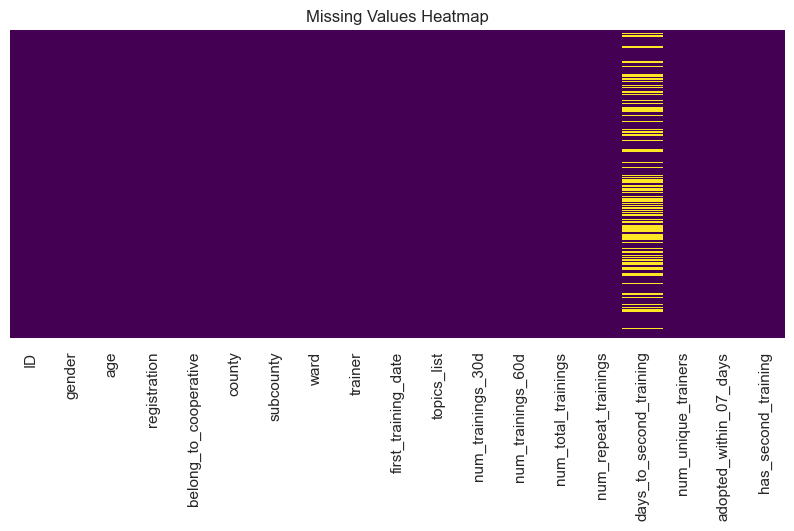


Categorical features cardinality:
gender: 2 unique values
age: 2 unique values
registration: 2 unique values
county: 10 unique values
subcounty: 31 unique values
ward: 85 unique values
trainer: 9 unique values


In [14]:
print("Missing values in Train:")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])

plt.figure(figsize=(10, 4))
sns.heatmap(train_df.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

print("\nCategorical features cardinality:")
cat_cols = train_df.select_dtypes(include=["object", "string"]).columns
for col in cat_cols:
    if col not in ["ID", "topics_list", "first_training_date"]:
        print(f"{col}: {train_df[col].nunique()} unique values")

In [15]:
# filling of the missing value in the train dataset
mean_value = train_df["days_to_second_training"].mean()
train_df["days_to_second_training"].fillna(mean_value, inplace=True)
print(mean_value)

6.146529562982005


Missing values in Test:
days_to_second_training    851
dtype: int64


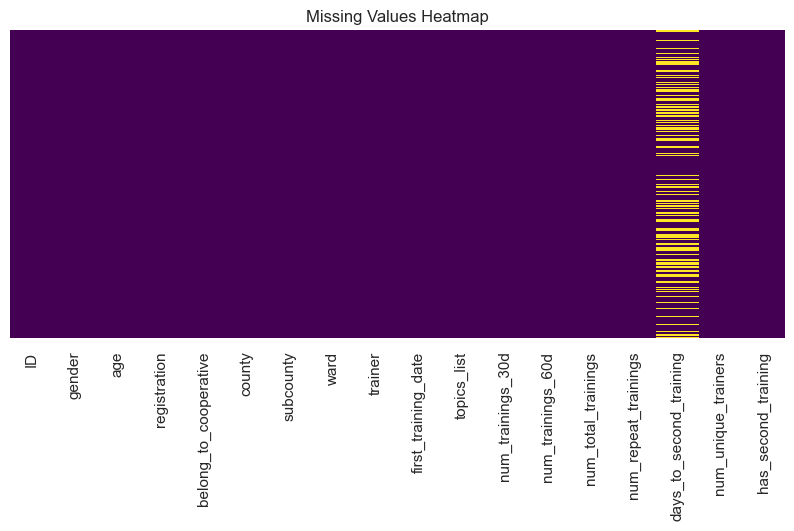


Categorical features cardinality:
gender: 2 unique values
age: 2 unique values
registration: 2 unique values
county: 9 unique values
subcounty: 29 unique values
ward: 82 unique values
trainer: 9 unique values


In [16]:
print("Missing values in Test:")
print(test_df.isnull().sum()[test_df.isnull().sum() > 0])

plt.figure(figsize=(10, 4))
sns.heatmap(test_df.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

print("\nCategorical features cardinality:")
cat_cols = test_df.select_dtypes(include=["object", "string"]).columns
for col in cat_cols:
    if col not in ["ID", "topics_list", "first_training_date"]:
        print(f"{col}: {test_df[col].nunique()} unique values")

In [17]:
# filling of the missing value in the train dataset
mean_value = test_df["days_to_second_training"].mean()
test_df["days_to_second_training"].fillna(mean_value, inplace=True)
print(mean_value)

5.159031413612565


In [18]:
train_df.isnull().sum() | test_df.isnull().sum()

ID                         False
adopted_within_07_days     False
age                        False
belong_to_cooperative      False
county                     False
days_to_second_training    False
first_training_date        False
gender                     False
has_second_training        False
num_repeat_trainings       False
num_total_trainings        False
num_trainings_30d          False
num_trainings_60d          False
num_unique_trainers        False
registration               False
subcounty                  False
topics_list                False
trainer                    False
ward                       False
dtype: bool

In [19]:
def preprocess_topics(df):
    def parse_topics(x):
        try:
            # Handle list strings that might contain comma-separated topics
            items = ast.literal_eval(x)
            all_topics = []
            for item in items:
                all_topics.extend([t.strip() for t in item.split(",")])
            return list(set(all_topics))
        except:
            return []
    df["parsed_topics"] = df["topics_list"].apply(parse_topics)
    df["num_topics"] = df["parsed_topics"].apply(len)
    return df

train = preprocess_topics(train_df)
test = preprocess_topics(test_df)

# Identify most frequent topics to create binary features
all_topics = [topic for sublist in train["parsed_topics"] for topic in sublist]
common_topics = pd.Series(all_topics).value_counts().head(20).index.tolist()

for topic in common_topics:
    safe_topic = topic.replace(" ", "_").replace("(", "").replace(")", "").replace(".", "").replace(",", "").replace("&", "and")
    train[f"topic_{safe_topic}"] = train["parsed_topics"].apply(lambda x: 1 if topic in x else 0)
    test[f"topic_{safe_topic}"] = test["parsed_topics"].apply(lambda x: 1 if topic in x else 0)

# Temporal and Engagment features
for df in [train, test]:
    df["first_training_date"] = pd.to_datetime(df["first_training_date"])
    df["day_of_week"] = df["first_training_date"].dt.dayofweek
    df["month"] = df["first_training_date"].dt.month
    df["is_weekend"] = df["day_of_week"].apply(lambda x: 1 if x >= 5 else 0)
    df["has_second_training_val"] = (df["days_to_second_training"] != -1).astype(int)
    df['day_of_year'] = df['first_training_date'].dt.dayofyear
    df['quarter'] = df['first_training_date'].dt.quarter
    df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
     
    num_cols_to_clip = ["num_trainings_30d", "num_trainings_60d", "num_total_trainings", "num_repeat_trainings"]
    for col in num_cols_to_clip:
        upper = df.iloc[:len(train)][col].quantile(0.99)
        df[col] = df[col].clip(upper=upper)
        
    for col in ["ward", "subcounty", "county", "trainer"]:
        counts = df[col].value_counts().to_dict()
        df[f'{col}_count'] = df[col].map(counts)
        
    cat_cols = ["gender", "age", "registration", "county", "subcounty", "ward", "trainer"]
    for col in cat_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        
    drop_cols = ["ID", "topics_list", "parsed_topics", "first_training_date"]
    df = df.drop(columns=drop_cols)

print(f"Features created. New shape: {train.shape}")
print(f"Features created. New shape: {test.shape}")

Features created. New shape: (5525, 50)
Features created. New shape: (2379, 49)


## EXPLORATIVE ANAYSIS

### ANALYSIS OF THE TRAIN_SET

In [20]:
train_df.dtypes

ID                                                              object
gender                                                           int32
age                                                              int32
registration                                                     int32
belong_to_cooperative                                            int64
county                                                           int32
subcounty                                                        int32
ward                                                             int32
trainer                                                          int32
first_training_date                                     datetime64[ns]
topics_list                                                     object
num_trainings_30d                                              float64
num_trainings_60d                                              float64
num_total_trainings                                            float64
num_re

In [21]:
train_df["first_training_date"].head()

0   2024-02-19
1   2024-02-20
2   2024-02-21
3   2024-02-19
4   2024-02-27
Name: first_training_date, dtype: datetime64[ns]

In [22]:
import datetime
# convertingPRODUCTION_DATE to datetime
train_df["first_training_date"] = pd.to_datetime(train_df['first_training_date'], format='%Y-%m-%d')

In [23]:
# convertingPRODUCTION_DATE to datetime
test_df["first_training_date"] = pd.to_datetime(test_df['first_training_date'], format='%Y-%m-%d')

#### Univerate Analysis

Target Distribution (normalized):
adopted_within_07_days
0    0.888326
1    0.111674
Name: proportion, dtype: float64


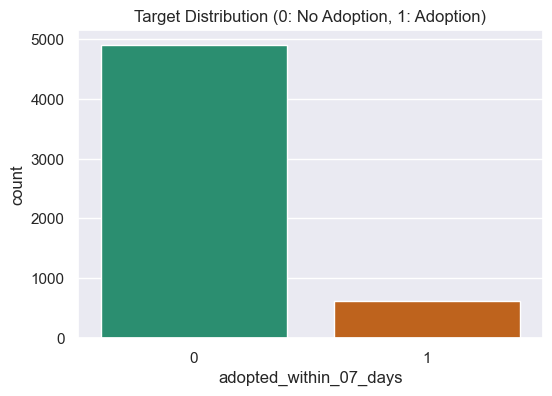

In [24]:
target = "adopted_within_07_days"
print("Target Distribution (normalized):")
print(train_df[target].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x=target, data=train_df, palette="Dark2")
plt.title("Target Distribution (0: No Adoption, 1: Adoption)")
plt.show()

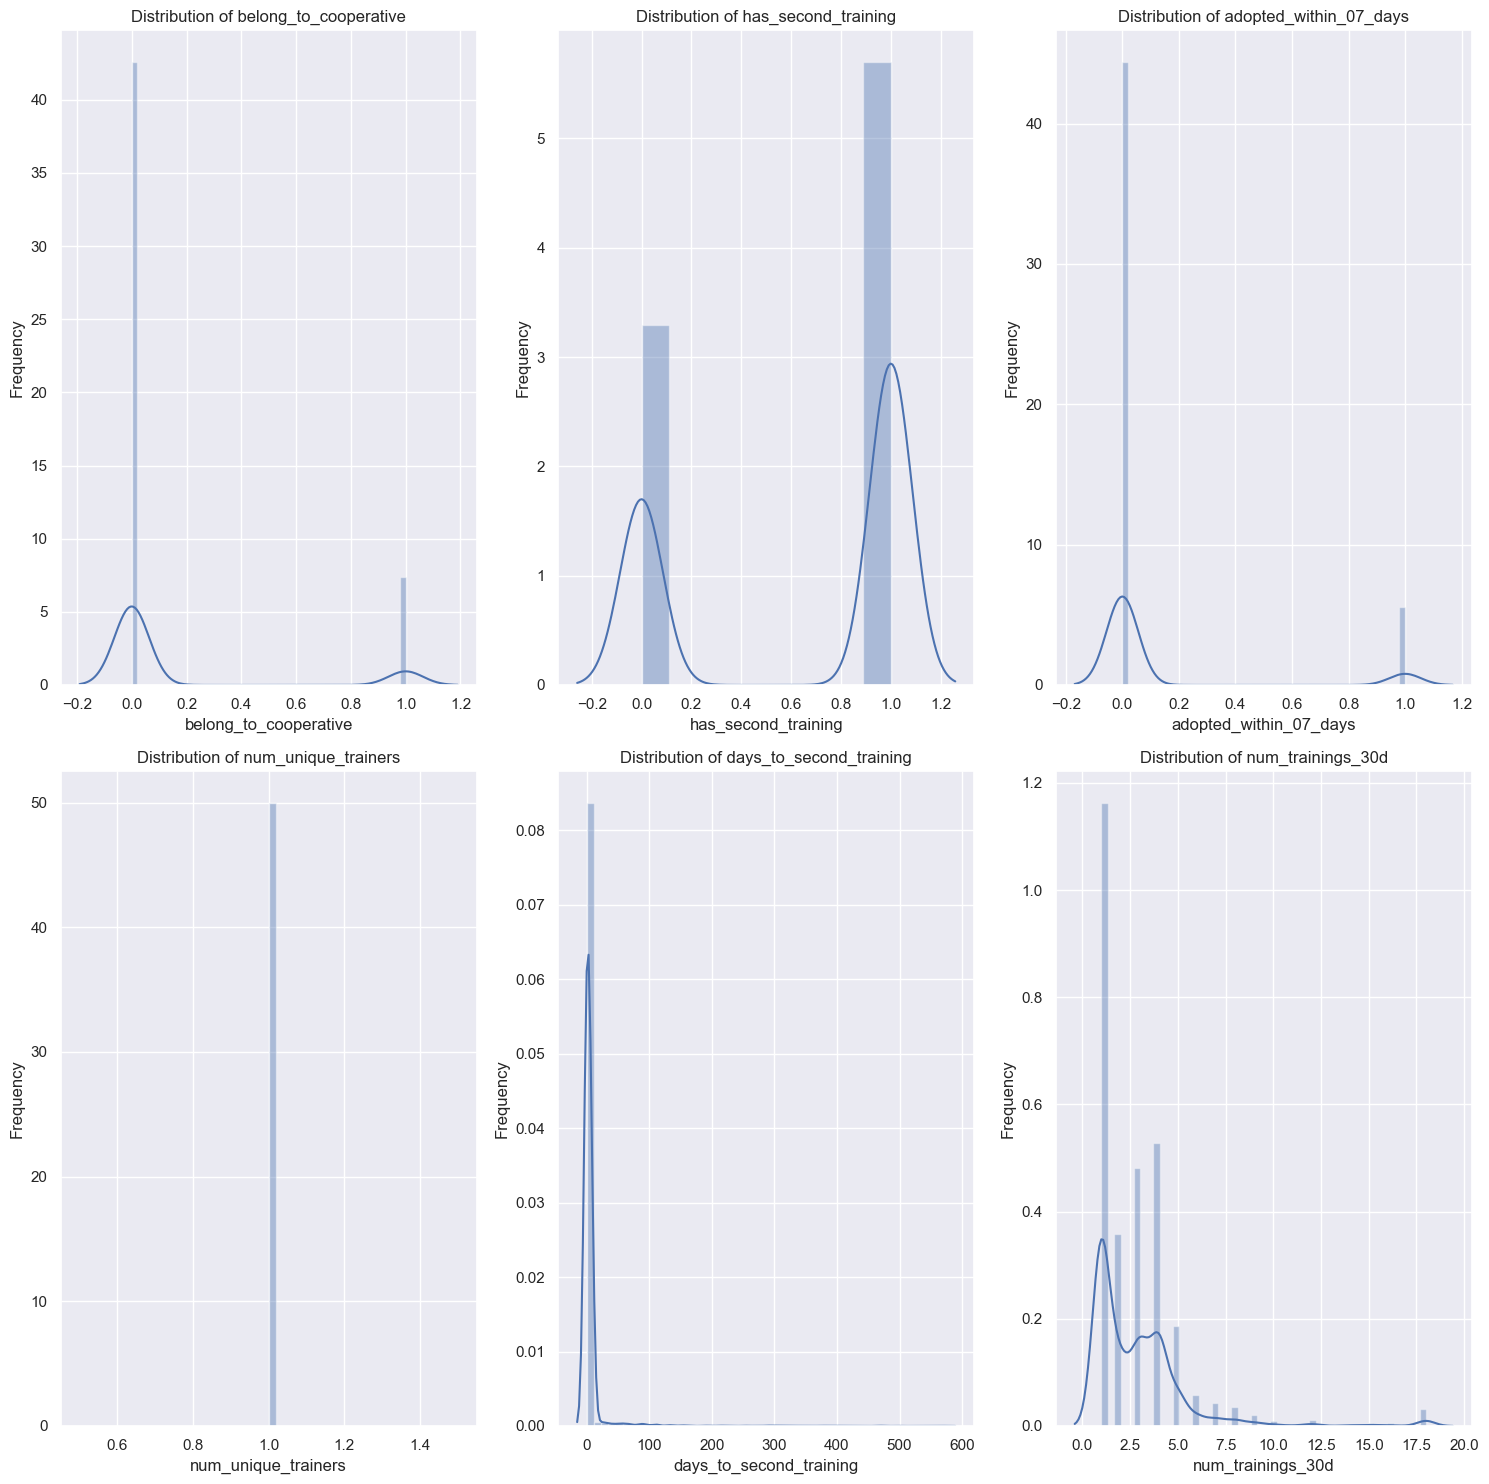

In [25]:
# Plotting all univarient image
fig, axes = plt.subplots(2,3, figsize=(15, 15))
axes = axes.flatten()

# Columns to plot
columns = [
    	'belong_to_cooperative',	'has_second_training','adopted_within_07_days','num_unique_trainers',
         'days_to_second_training',	'num_trainings_30d',
]

# creating a function to create the title and labels of the plot
for i, col in enumerate(columns):
    sns.distplot(train_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#### BIVARTE ANALYSIS

<Figure size 900x600 with 0 Axes>

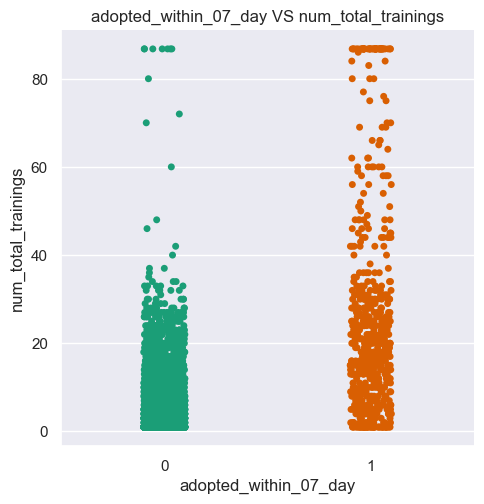

In [26]:
# OIL PRODUCTION PER YEAR
#"strip", "swarm", "box", "violin","boxen", "point", "bar", or "count".
plt.figure(figsize=(9, 6))
# creating a cat plot
sns.catplot(y="num_total_trainings", x="adopted_within_07_days",palette='Dark2', kind='strip',data=train_df[:6000]);
# creating title, x-axis name, y-axis name
plt.title('adopted_within_07_day VS num_total_trainings')
plt.ylabel('num_total_trainings')
plt.xlabel('adopted_within_07_day')
plt.show()

<Figure size 900x600 with 0 Axes>

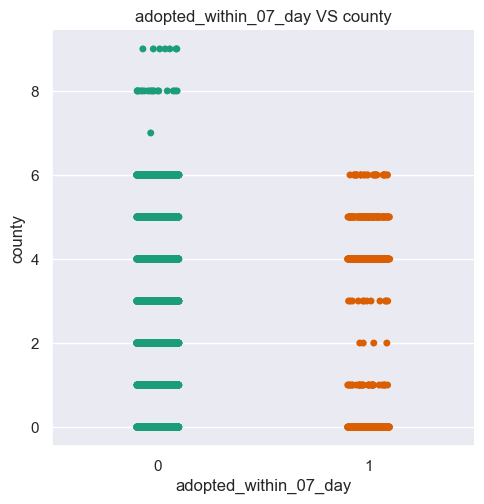

In [27]:
# OIL PRODUCTION PER YEAR
#"strip", "swarm", "box", "violin","boxen", "point", "bar", or "count".
plt.figure(figsize=(9, 6))
# creating a cat plot
sns.catplot(y="county", x="adopted_within_07_days",palette='Dark2', kind='strip',data=train_df[:6000]);
# creating title, x-axis name, y-axis name
plt.title('adopted_within_07_day VS county')
plt.ylabel('county')
plt.xlabel('adopted_within_07_day')
plt.show()

<Figure size 900x600 with 0 Axes>

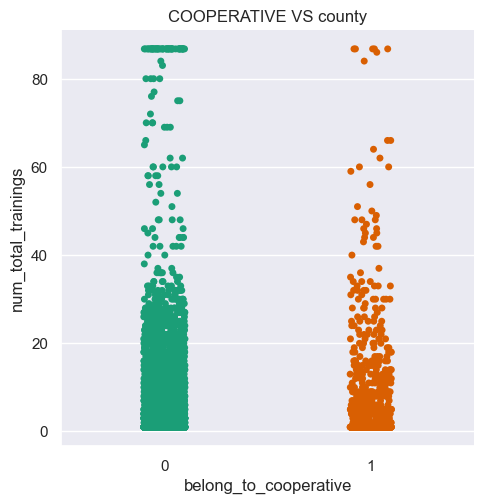

In [28]:
# OIL PRODUCTION PER YEAR
#"strip", "swarm", "box", "violin","boxen", "point", "bar", or "count".
plt.figure(figsize=(9, 6))
# creating a cat plot
sns.catplot(y="num_total_trainings", x="belong_to_cooperative",palette='Dark2', kind='strip',data=train_df[:6000]);
# creating title, x-axis name, y-axis name
plt.title('COOPERATIVE VS county')
plt.ylabel('num_total_trainings')
plt.xlabel('belong_to_cooperative')
plt.show()

<Figure size 900x600 with 0 Axes>

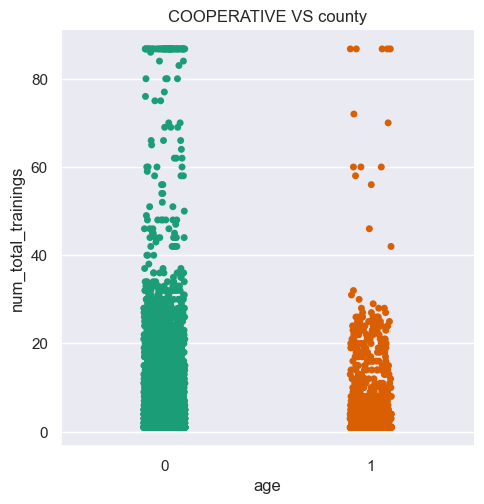

In [29]:
# OIL PRODUCTION PER YEAR
#"strip", "swarm", "box", "violin","boxen", "point", "bar", or "count".
plt.figure(figsize=(9, 6))
# creating a cat plot
sns.catplot(y="num_total_trainings", x="age",palette='Dark2', kind='strip',data=train_df[:6000]);
# creating title, x-axis name, y-axis name
plt.title('COOPERATIVE VS county')
plt.ylabel('num_total_trainings')
plt.xlabel('age')
plt.show()

<Figure size 900x600 with 0 Axes>

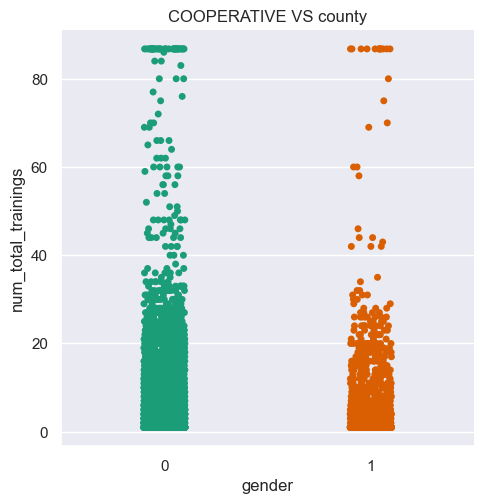

In [30]:
plt.figure(figsize=(9, 6))
# creating a cat plot
sns.catplot(y="num_total_trainings", x="gender",palette='Dark2', kind='strip',data=train_df[:6000]);
# creating title, x-axis name, y-axis name
plt.title('COOPERATIVE VS county')
plt.ylabel('num_total_trainings')
plt.xlabel('gender')
plt.show()

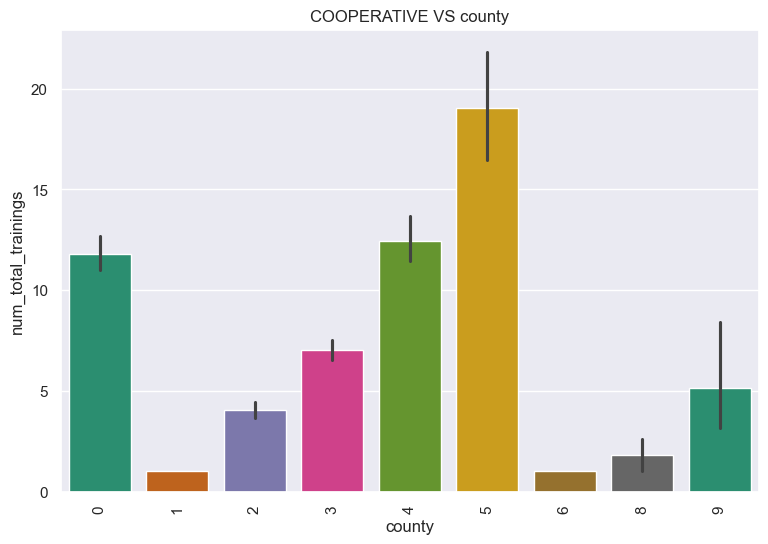

In [31]:
plt.figure(figsize=(9, 6))
# creating a cat plot
sns.barplot(y="num_total_trainings", x="county",palette='Dark2',data=train_df[:5000])
# creating title, x-axis name, y-axis name
plt.title('COOPERATIVE VS county')
plt.ylabel('num_total_trainings')
plt.xlabel('county')
# Tilt x-axis tick labels
plt.xticks(rotation=90)
plt.show()

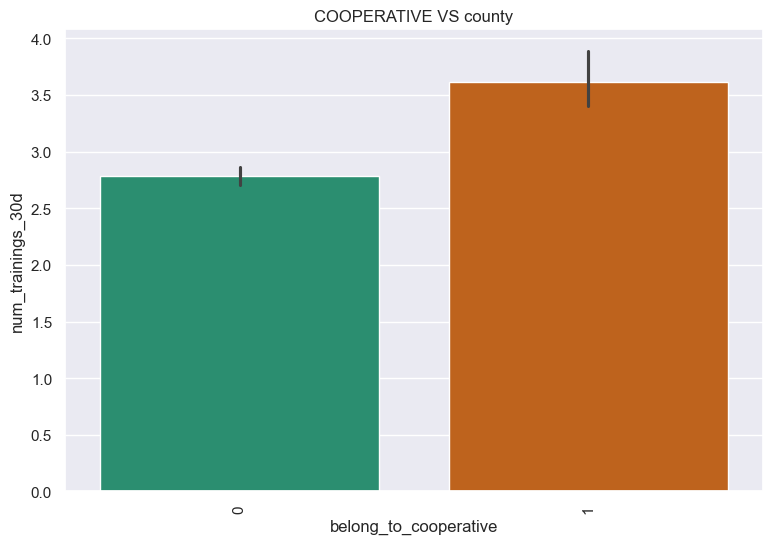

In [32]:
plt.figure(figsize=(9, 6))
# creating a cat plot
sns.barplot(y="num_trainings_30d", x="belong_to_cooperative",palette='Dark2',data=train_df[:5000])
# creating title, x-axis name, y-axis name
plt.title('COOPERATIVE VS county')
plt.ylabel('num_trainings_30d')
plt.xlabel('belong_to_cooperative')
# Tilt x-axis tick labels
plt.xticks(rotation=90)
plt.show()

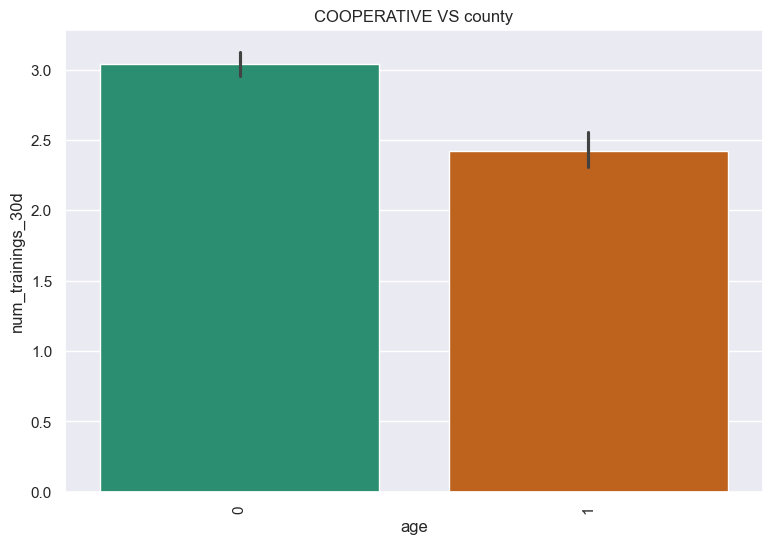

In [33]:
plt.figure(figsize=(9, 6))
# creating a cat plot
sns.barplot(y="num_trainings_30d", x="age",palette='Dark2',data=train_df[:5000])
# creating title, x-axis name, y-axis name
plt.title('COOPERATIVE VS county')
plt.ylabel('num_trainings_30d')
plt.xlabel('age')
# Tilt x-axis tick labels
plt.xticks(rotation=90)
plt.show()

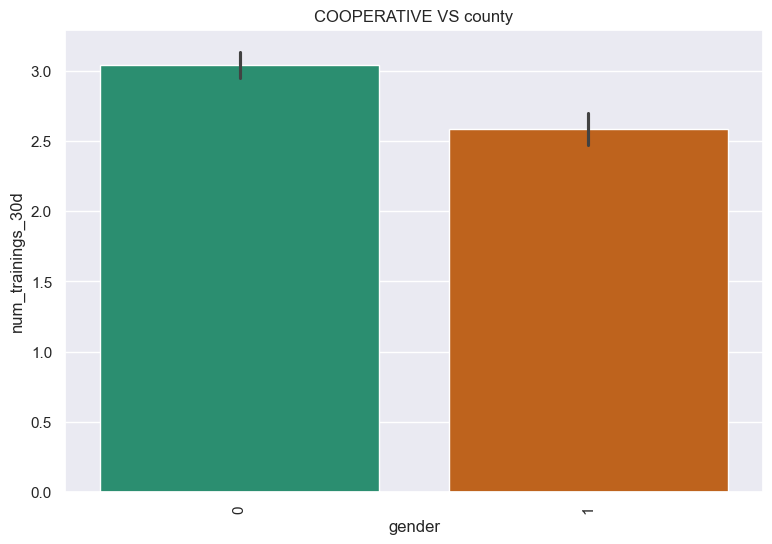

In [34]:
plt.figure(figsize=(9, 6))
# creating a cat plot
sns.barplot(y="num_trainings_30d", x="gender",palette='Dark2',data=train_df[:5000])
# creating title, x-axis name, y-axis name
plt.title('COOPERATIVE VS county')
plt.ylabel('num_trainings_30d')
plt.xlabel('gender')
# Tilt x-axis tick labels
plt.xticks(rotation=90)
plt.show()

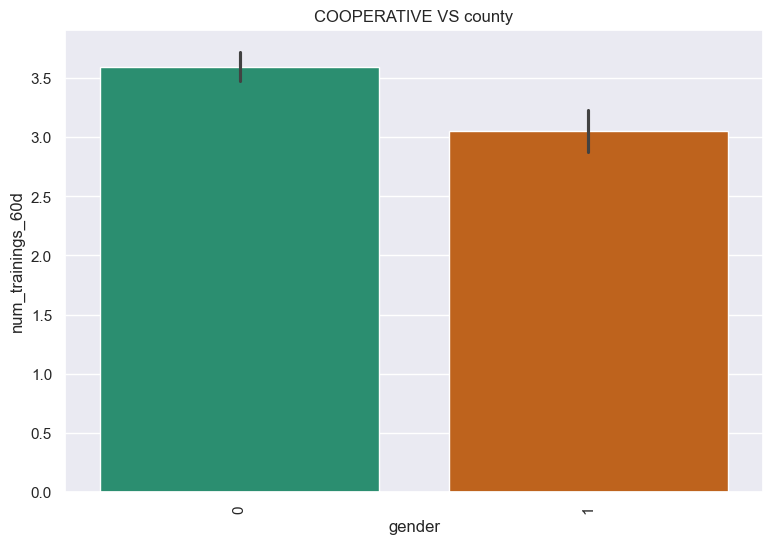

In [35]:
plt.figure(figsize=(9, 6))
# creating a cat plot
sns.barplot(y="num_trainings_60d", x="gender",palette='Dark2',data=train_df[:5000])
# creating title, x-axis name, y-axis name
plt.title('COOPERATIVE VS county')
plt.ylabel('num_trainings_60d')
plt.xlabel('gender')
# Tilt x-axis tick labels
plt.xticks(rotation=90)
plt.show()

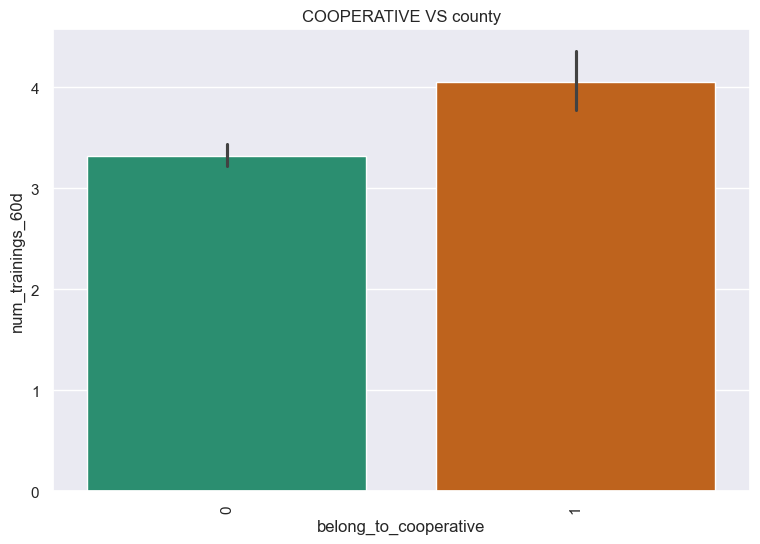

In [36]:
plt.figure(figsize=(9, 6))
# creating a cat plot
sns.barplot(y="num_trainings_60d", x="belong_to_cooperative",palette='Dark2',data=train_df[:5000])
# creating title, x-axis name, y-axis name
plt.title('COOPERATIVE VS county')
plt.ylabel('num_trainings_60d')
plt.xlabel('belong_to_cooperative')
# Tilt x-axis tick labels
plt.xticks(rotation=90)
plt.show()

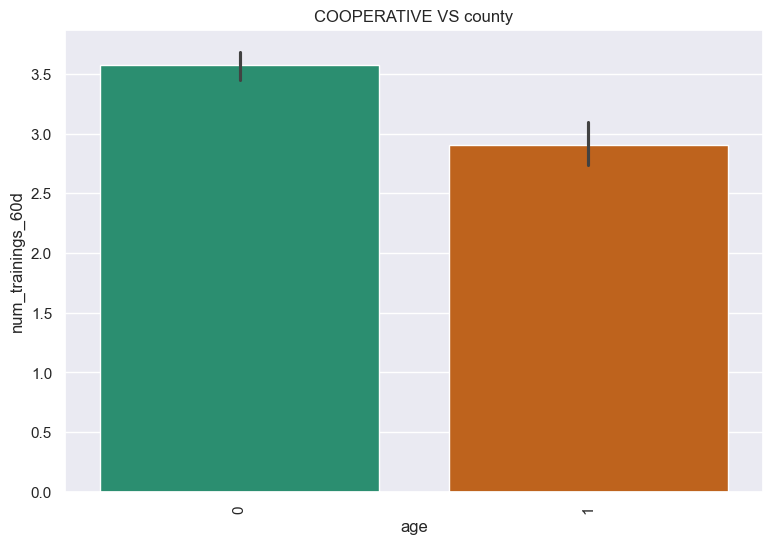

In [37]:
plt.figure(figsize=(9, 6))
# creating a cat plot
sns.barplot(y="num_trainings_60d", x="age",palette='Dark2',data=train_df[:5000])
# creating title, x-axis name, y-axis name
plt.title('COOPERATIVE VS county')
plt.ylabel('num_trainings_60d')
plt.xlabel('age')
# Tilt x-axis tick labels
plt.xticks(rotation=90)
plt.show()

#### TRIVARTE ANAYSIS

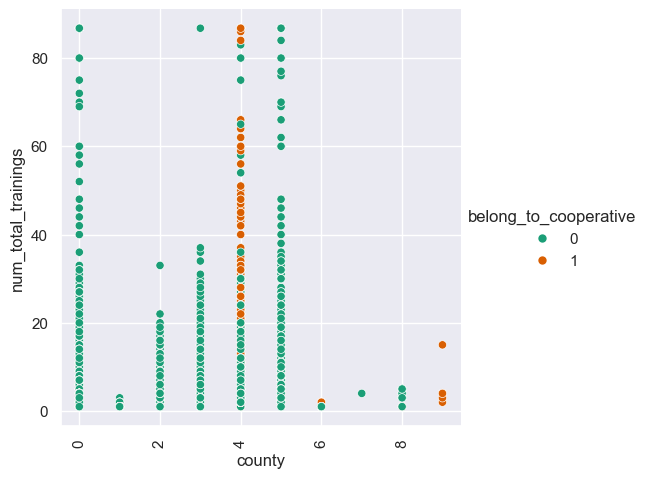

In [38]:
# creating a jiont plot
sns.relplot(x="county", y="num_total_trainings",hue ='belong_to_cooperative',palette= 'Dark2',data=train_df)
# Tilt x-axis tick labels
plt.xticks(rotation=90)
plt.show()


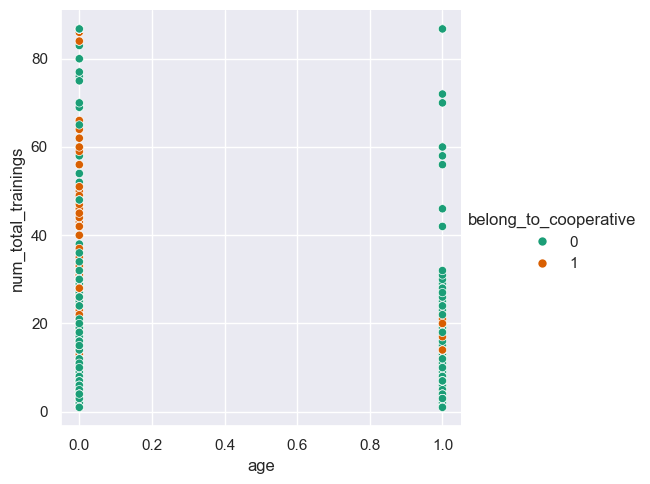

In [39]:
# creating a replot
sns.relplot(x="age", y="num_total_trainings",hue ='belong_to_cooperative',palette= 'Dark2',data=train_df)
plt.show()

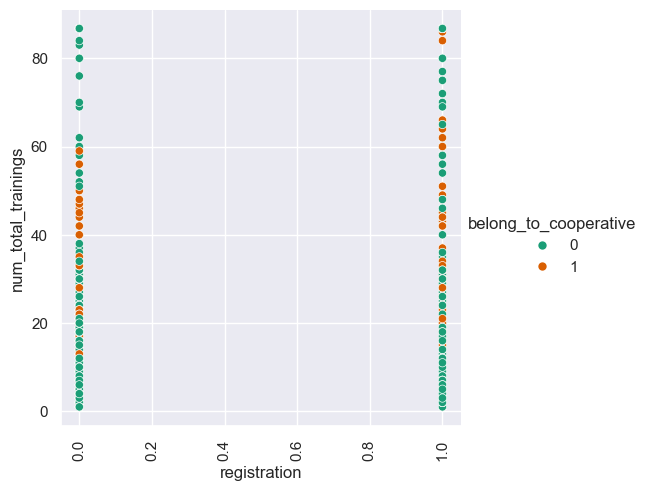

In [40]:
# creating a jiont plot
sns.relplot(x="registration", y="num_total_trainings",hue ='belong_to_cooperative',palette= 'Dark2',data=train_df)
# Tilt x-axis tick labels
plt.xticks(rotation=90)
plt.show()


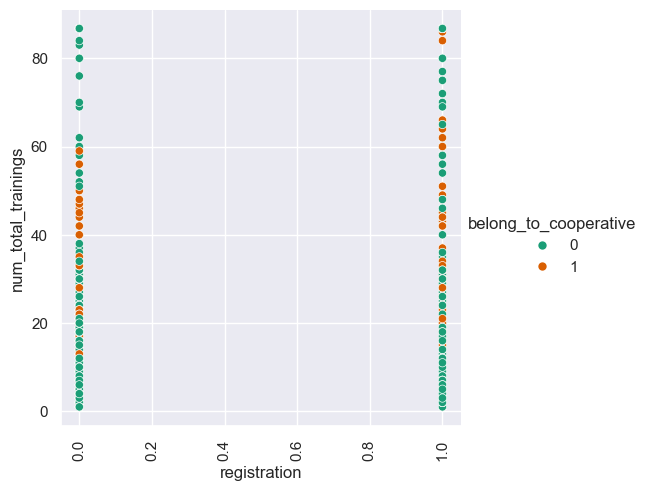

In [41]:
# creating a jiont plot
sns.relplot(x="registration", y="num_total_trainings",hue ='belong_to_cooperative',palette= 'Dark2',data=train_df)
# Tilt x-axis tick labels
plt.xticks(rotation=90)
plt.show()


### ANALYSIS OF THE TEST DATASET

#### UNIVERAte analysis 

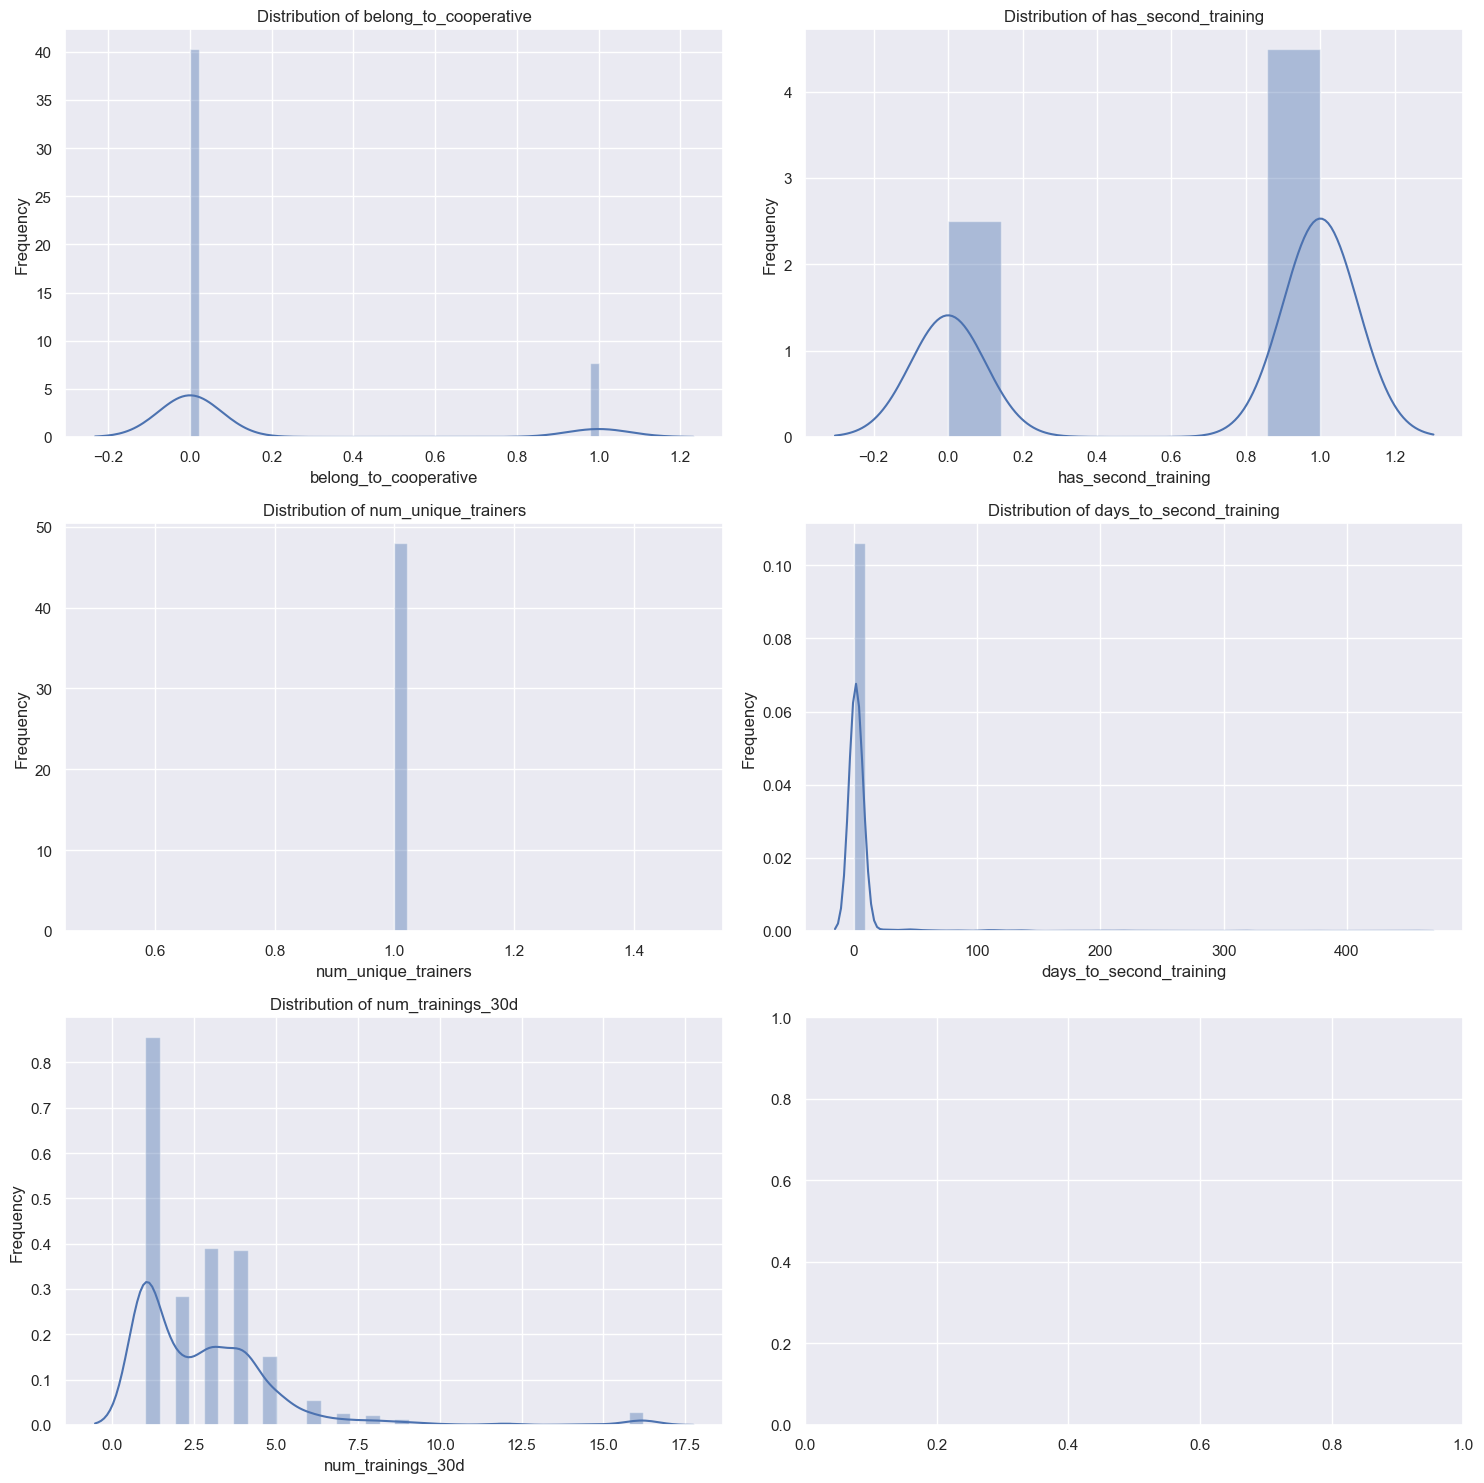

In [42]:
# Plotting all univarient image
fig, axes = plt.subplots(3,2, figsize=(15, 15))
axes = axes.flatten()

# Columns to plot
columns = [
    	'belong_to_cooperative',	'has_second_training','num_unique_trainers',
         'days_to_second_training',	'num_trainings_30d',
]

# creating a function to create the title and labels of the plot
for i, col in enumerate(columns):
    sns.distplot(test_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#### BIVARENT ANAYSIS

<Figure size 900x600 with 0 Axes>

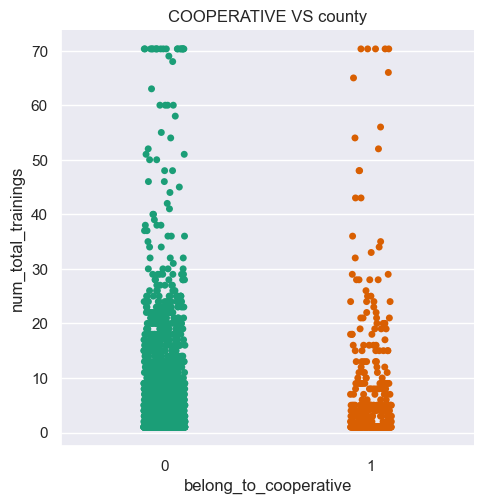

In [43]:

# OIL PRODUCTION PER YEAR
#"strip", "swarm", "box", "violin","boxen", "point", "bar", or "count".
plt.figure(figsize=(9, 6))
# creating a cat plot
sns.catplot(y="num_total_trainings", x="belong_to_cooperative",palette='Dark2', kind='strip',data=test_df[:6000]);
# creating title, x-axis name, y-axis name
plt.title('COOPERATIVE VS county')
plt.ylabel('num_total_trainings')
plt.xlabel('belong_to_cooperative')
plt.show()

<Figure size 900x600 with 0 Axes>

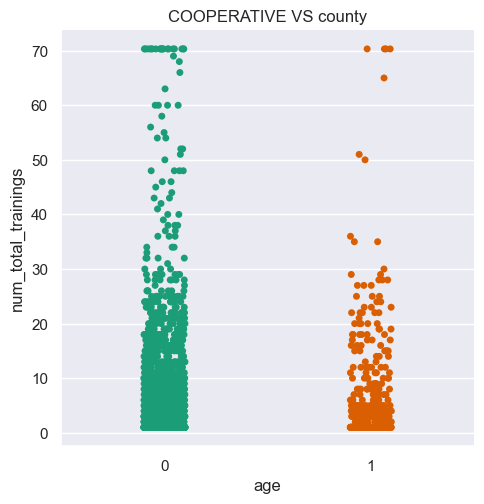

In [44]:
# OIL PRODUCTION PER YEAR
#"strip", "swarm", "box", "violin","boxen", "point", "bar", or "count".
plt.figure(figsize=(9, 6))
# creating a cat plot
sns.catplot(y="num_total_trainings", x="age",palette='Dark2', kind='strip',data=test_df[:6000]);
# creating title, x-axis name, y-axis name
plt.title('COOPERATIVE VS county')
plt.ylabel('num_total_trainings')
plt.xlabel('age')
plt.show()

<Figure size 900x600 with 0 Axes>

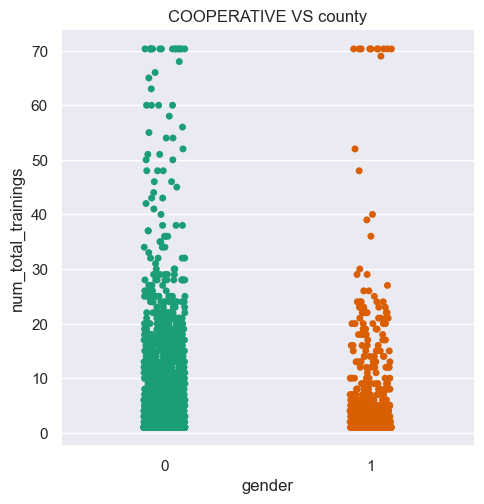

In [45]:
plt.figure(figsize=(9, 6))
# creating a cat plot
sns.catplot(y="num_total_trainings", x="gender",palette='Dark2', kind='strip',data=test_df[:6000]);
# creating title, x-axis name, y-axis name
plt.title('COOPERATIVE VS county')
plt.ylabel('num_total_trainings')
plt.xlabel('gender')
plt.show()

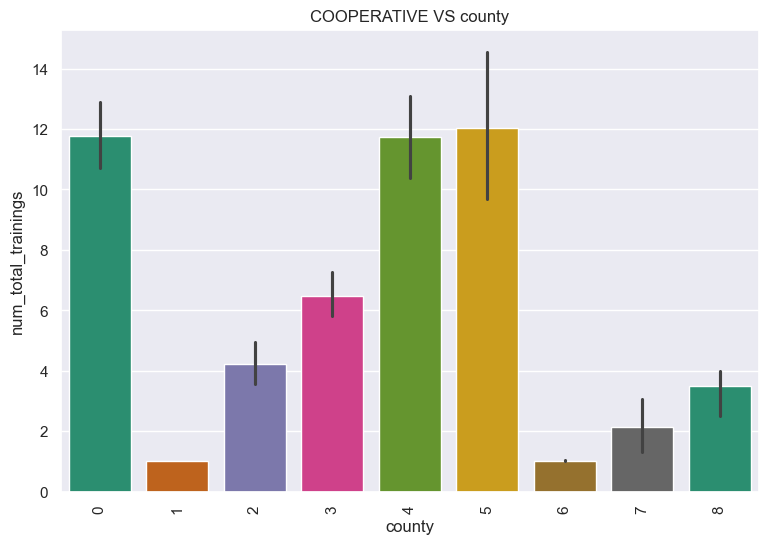

In [46]:
plt.figure(figsize=(9, 6))
# creating a cat plot
sns.barplot(y="num_total_trainings", x="county",palette='Dark2',data=test_df[:5000])
# creating title, x-axis name, y-axis name
plt.title('COOPERATIVE VS county')
plt.ylabel('num_total_trainings')
plt.xlabel('county')
# Tilt x-axis tick labels
plt.xticks(rotation=90)
plt.show()

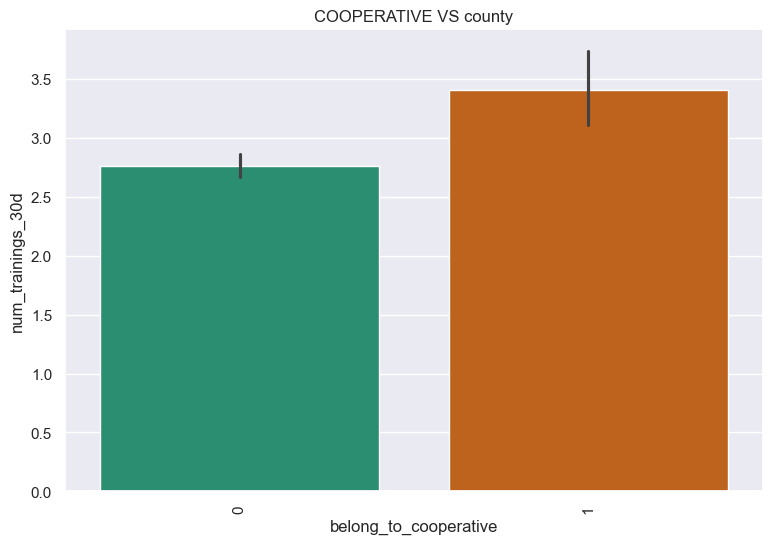

In [47]:
plt.figure(figsize=(9, 6))
# creating a cat plot
sns.barplot(y="num_trainings_30d", x="belong_to_cooperative",palette='Dark2',data=test_df[:5000])
# creating title, x-axis name, y-axis name
plt.title('COOPERATIVE VS county')
plt.ylabel('num_trainings_30d')
plt.xlabel('belong_to_cooperative')
# Tilt x-axis tick labels
plt.xticks(rotation=90)
plt.show()

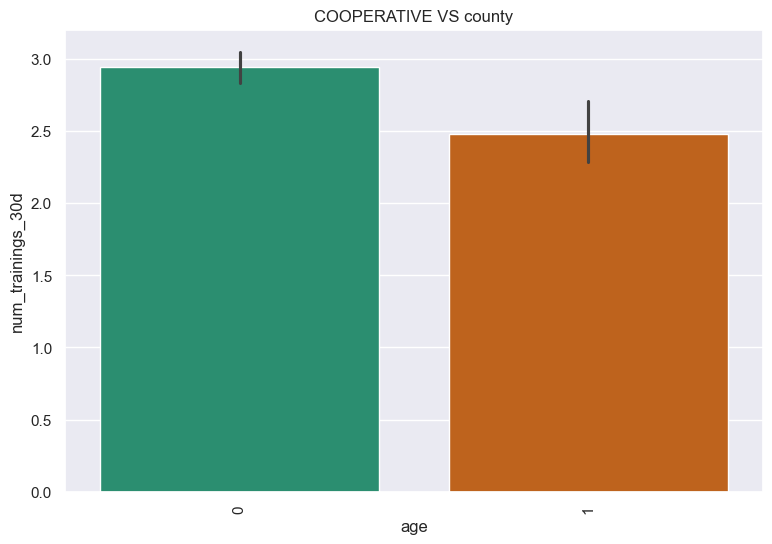

In [48]:
plt.figure(figsize=(9, 6))
# creating a cat plot
sns.barplot(y="num_trainings_30d", x="age",palette='Dark2',data=test_df[:5000])
# creating title, x-axis name, y-axis name
plt.title('COOPERATIVE VS county')
plt.ylabel('num_trainings_30d')
plt.xlabel('age')
# Tilt x-axis tick labels
plt.xticks(rotation=90)
plt.show()

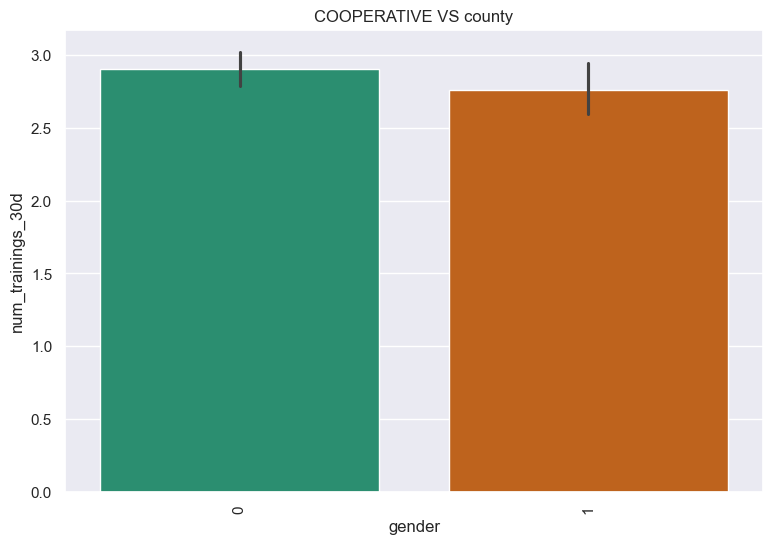

In [49]:
plt.figure(figsize=(9, 6))
# creating a cat plot
sns.barplot(y="num_trainings_30d", x="gender",palette='Dark2',data=test_df[:5000])
# creating title, x-axis name, y-axis name
plt.title('COOPERATIVE VS county')
plt.ylabel('num_trainings_30d')
plt.xlabel('gender')
# Tilt x-axis tick labels
plt.xticks(rotation=90)
plt.show()

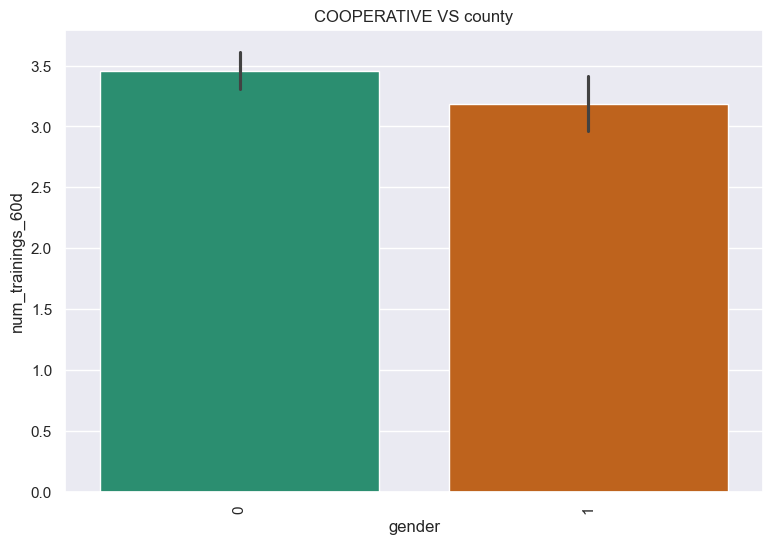

In [50]:
plt.figure(figsize=(9, 6))
# creating a cat plot
sns.barplot(y="num_trainings_60d", x="gender",palette='Dark2',data=test_df[:5000])
# creating title, x-axis name, y-axis name
plt.title('COOPERATIVE VS county')
plt.ylabel('num_trainings_60d')
plt.xlabel('gender')
# Tilt x-axis tick labels
plt.xticks(rotation=90)
plt.show()

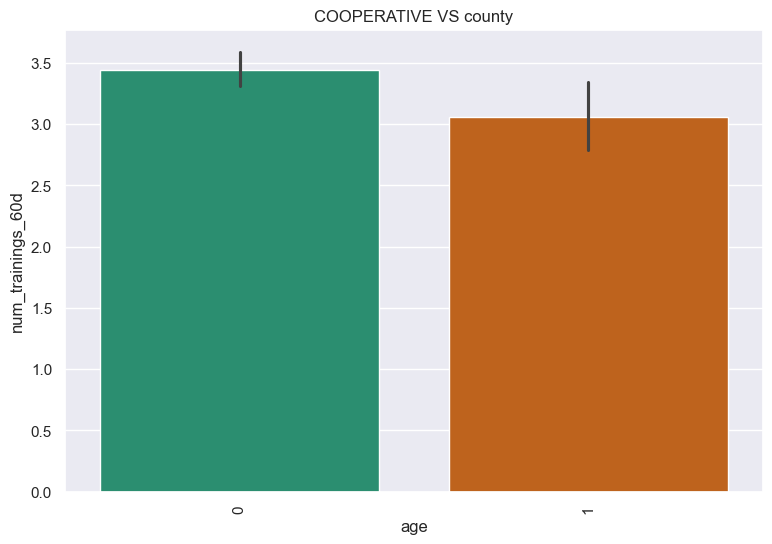

In [51]:
plt.figure(figsize=(9, 6))
# creating a cat plot
sns.barplot(y="num_trainings_60d", x="age",palette='Dark2',data=test_df[:5000])
# creating title, x-axis name, y-axis name
plt.title('COOPERATIVE VS county')
plt.ylabel('num_trainings_60d')
plt.xlabel('age')
# Tilt x-axis tick labels
plt.xticks(rotation=90)
plt.show()

#### TRIVARENT ANALYSIS

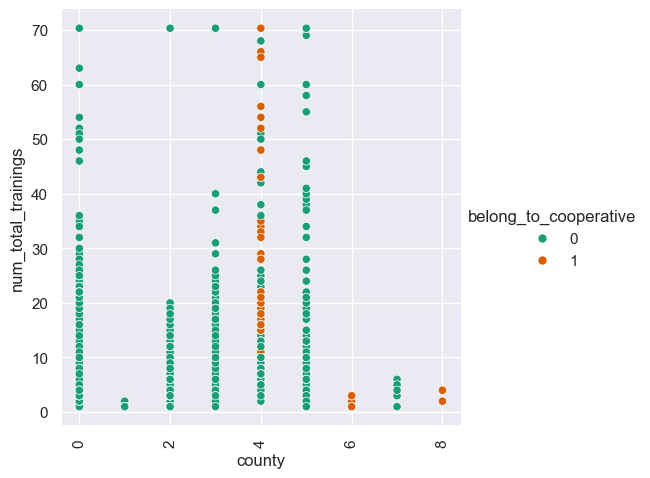

In [52]:
# creating a jiont plot
sns.relplot(x="county", y="num_total_trainings",hue ='belong_to_cooperative',palette= 'Dark2',data=test_df)
# Tilt x-axis tick labels
plt.xticks(rotation=90)
plt.show()


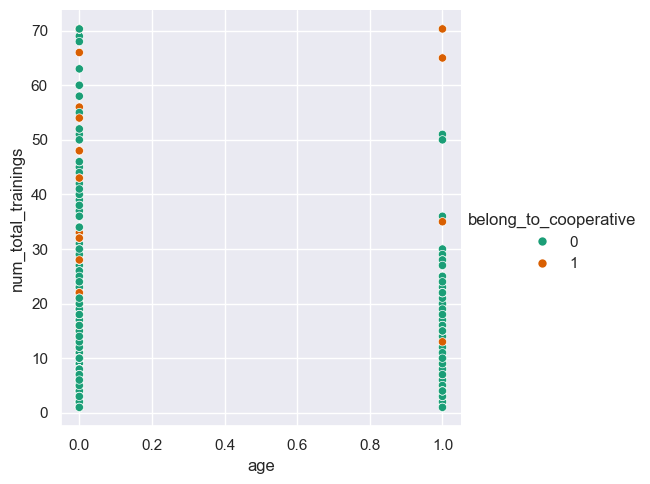

In [53]:
# creating a replot
sns.relplot(x="age", y="num_total_trainings",hue ='belong_to_cooperative',palette= 'Dark2',data=test_df)
plt.show()

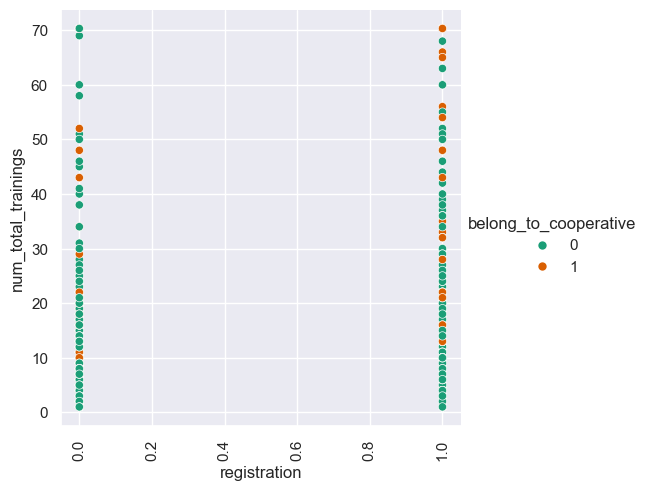

In [54]:
# creating a jiont plot
sns.relplot(x="registration", y="num_total_trainings",hue ='belong_to_cooperative',palette= 'Dark2',data=test_df)
# Tilt x-axis tick labels
plt.xticks(rotation=90)
plt.show()


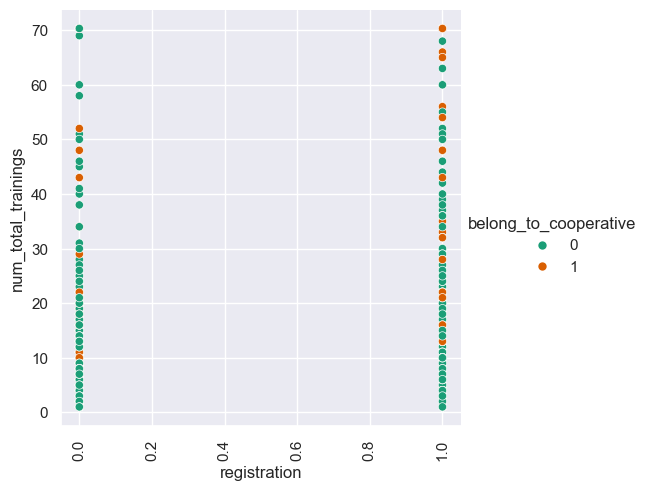

In [55]:
# creating a jiont plot
sns.relplot(x="registration", y="num_total_trainings",hue ='belong_to_cooperative',palette= 'Dark2',data=test_df)
# Tilt x-axis tick labels
plt.xticks(rotation=90)
plt.show()


In [56]:
# checking the dypes of the train set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5525 entries, 0 to 5524
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   ID                                                    5525 non-null   object        
 1   gender                                                5525 non-null   int32         
 2   age                                                   5525 non-null   int32         
 3   registration                                          5525 non-null   int32         
 4   belong_to_cooperative                                 5525 non-null   int64         
 5   county                                                5525 non-null   int32         
 6   subcounty                                             5525 non-null   int32         
 7   ward                                                  5525 non-null   int32   

In [57]:
# checking the dypes of the train set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   ID                                                    2379 non-null   object        
 1   gender                                                2379 non-null   int32         
 2   age                                                   2379 non-null   int32         
 3   registration                                          2379 non-null   int32         
 4   belong_to_cooperative                                 2379 non-null   int64         
 5   county                                                2379 non-null   int32         
 6   subcounty                                             2379 non-null   int32         
 7   ward                                                  2379 non-null   int32   

In [58]:
train['parsed_topics_tuple'] = train['parsed_topics'].apply(lambda x: tuple(x) if isinstance(x, list) else x)
train['parsed_topics_cat'] = train['parsed_topics_tuple'].astype('category').cat.codes


In [59]:
train['topics_list_tuple'] = train['topics_list'].apply(lambda x: tuple(x) if isinstance(x, list) else x)
train['topics_list_cat'] = train['topics_list_tuple'].astype('category').cat.codes


In [60]:
train.head()

,ID,gender,age,registration,belong_to_cooperative,county,subcounty,ward,trainer,first_training_date,...,day_of_year,quarter,ward_count,subcounty_count,county_count,trainer_count,parsed_topics_tuple,parsed_topics_cat,topics_list_tuple,topics_list_cat
0,ID_ZWLDJB,0,0,0,1,4,5,40,5,2024-02-19,...,50,1,286,363,866,869,"(Asili Fertilizer (Organic), Calf Feeding, How...",297,"['Asili Fertilizer (Organic),Biodeal Poultry,B...",202
1,ID_4CICRQ,0,0,0,0,0,27,57,1,2024-02-20,...,51,1,1064,1068,1172,1172,"(How To Succeed In Breeding, Factors Affecting...",971,"['Ndume App', 'Poultry Feeding', 'Dairy Cow Fe...",2042
2,ID_DOOG2B,1,0,0,0,0,27,57,1,2024-02-21,...,52,1,1064,1068,1172,1172,"(Ndume App, Yara Maziwa Pro)",1372,"['Ndume App', 'Yara Maziwa Pro']",2056
3,ID_326OCM,0,0,0,0,5,24,1,4,2024-02-19,...,50,1,406,406,406,406,"(Poultry Mangt, How To Succeed In Breeding, Di...",2097,"['Dairy Cow Feeding', 'Poultry Feeding', 'Disa...",726
4,ID_93DWAH,0,0,0,1,4,21,19,5,2024-02-27,...,58,1,234,473,866,869,"(Health And Feeds, Poultry Products, Record Ke...",703,"['Benfits Of Sistema Biogas,Biodeal Poultry,Bi...",334


In [61]:
train.drop(['ID','topics_list_tuple','topics_list','first_training_date','parsed_topics','parsed_topics_tuple'], axis =1,inplace=True)

In [62]:
test['parsed_topics_tuple'] = test['parsed_topics'].apply(lambda x: tuple(x) if isinstance(x, list) else x)
test['parsed_topics_cat'] = test['parsed_topics_tuple'].astype('category').cat.codes


In [63]:
test['topics_list_tuple'] = test['topics_list'].apply(lambda x: tuple(x) if isinstance(x, list) else x)
test['topics_list_cat'] = test['topics_list_tuple'].astype('category').cat.codes


In [64]:
test.drop(['ID','topics_list_tuple','topics_list','first_training_date','parsed_topics','parsed_topics_tuple'], axis =1,inplace=True)

### MODELING

In [65]:
# choosing target columns
target_columns = ['adopted_within_07_days']
y = train[target_columns]

# Dropping target columns
x = train.drop(target_columns, axis=1)


In [66]:
# importing scaler system
scaler= StandardScaler()
scaler

StandardScaler()

In [67]:
# fitting the scaler
x_normalize =pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x_normalize

,gender,age,registration,belong_to_cooperative,county,subcounty,ward,trainer,num_trainings_30d,num_trainings_60d,...,is_weekend,has_second_training_val,day_of_year,quarter,ward_count,subcounty_count,county_count,trainer_count,parsed_topics_cat,topics_list_cat
0,-0.617454,-0.474973,-1.195229,2.402256,0.586889,-1.058019,-0.103307,0.409430,-0.344296,-0.395916,...,-0.328452,0.0,-1.560218,-1.558032,-0.153989,-0.592276,0.064086,0.061479,-1.372481,-1.495951
1,-0.617454,-0.474973,-1.195229,-0.416275,-1.323028,1.183609,0.654511,-1.212146,0.420729,0.741005,...,-0.328452,0.0,-1.547894,-1.558032,1.951790,1.637452,1.403400,1.426428,-0.443322,0.684962
2,1.619553,-0.474973,-1.195229,-0.416275,-1.323028,1.183609,0.654511,-1.212146,-0.344296,-0.395916,...,-0.328452,0.0,-1.535570,-1.558032,1.951790,1.637452,1.403400,1.426428,0.109486,0.701556
3,-0.617454,-0.474973,-1.195229,-0.416275,1.064368,0.877932,-1.841829,0.004036,0.038217,-0.111686,...,-0.328452,0.0,-1.560218,-1.558032,0.170809,-0.456278,-1.949263,-2.024235,1.108952,-0.874865
4,-0.617454,-0.474973,-1.195229,2.402256,0.586889,0.572256,-1.039434,0.409430,0.803241,1.593695,...,-0.328452,0.0,-1.461628,-1.558032,-0.294736,-0.244375,0.064086,0.061479,-0.812780,-1.339495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,-0.617454,-0.474973,-1.195229,-0.416275,0.109410,-0.242881,-0.771969,-0.401358,0.038217,-0.111686,...,-0.328452,0.0,0.177433,0.636799,-0.906440,-1.120452,0.449248,0.444385,-0.838973,0.725262
5521,-0.617454,-0.474973,0.836660,-0.416275,-1.323028,-1.261803,1.278596,-1.212146,0.038217,-0.111686,...,-0.328452,0.0,1.619314,1.734214,-0.646601,-1.411424,1.403400,1.426428,0.032286,0.715779
5522,-0.617454,-0.474973,-1.195229,-0.416275,0.109410,-0.242881,-0.861124,-0.401358,-0.726808,-0.680146,...,-0.328452,0.0,1.212630,1.734214,-0.665548,-1.120452,0.449248,0.444385,-0.185529,0.460944
5523,-0.617454,-0.474973,-1.195229,-0.416275,0.109410,0.470364,0.297891,-0.401358,-0.726808,-0.680146,...,-0.328452,0.0,1.360515,1.734214,-0.554575,0.555797,0.449248,0.444385,-1.298038,-1.352533


In [68]:
#spliting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_normalize, y, test_size=0.25, random_state=SEED, stratify = y)

In [69]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train, y_train, x_val, y_val)

display(models)
print(models.head())

  0%|          | 0/29 [00:00<?, ?it/s]

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,


Empty DataFrame
Columns: [Accuracy, Balanced Accuracy, ROC AUC, F1 Score, Time Taken]
Index: []


In [70]:
from sklearn.metrics import log_loss, roc_auc_score

def train_test_eval(pipeline, x_train, y_, x_val, y_val, name):
    pipeline.fit(x_train, y_train)

    train_probs = pipeline.predict_proba(x_train)[:, 1]
    val_probs  = pipeline.predict_proba(x_val)[:, 1]

    train_logloss = log_loss(y_train, train_probs)
    val_logloss  = log_loss(y_val, val_probs)

    train_auc = roc_auc_score(y_train, train_probs)
    val_auc  = roc_auc_score(y_val, val_probs)

    print(f"\n{name}")
    print(f"Train LogLoss: {train_logloss:.4f} | val LogLoss: {val_logloss:.4f}")
    print(f"Train AUC:     {train_auc:.4f} | val AUC:     {val_auc:.4f}")


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

lr_pipeline = Pipeline([
    ("clf", LogisticRegression(
        class_weight="balanced",
        random_state=SEED,
        max_iter=1000
    ))
])

train_test_eval(lr_pipeline, x_train, y_train, x_val, y_val, "Logistic Regression")



Logistic Regression
Train LogLoss: 0.3440 | val LogLoss: 0.4302
Train AUC:     0.9375 | val AUC:     0.8802


In [72]:
from sklearn.tree import DecisionTreeClassifier

dt_pipeline = Pipeline([
    ("clf", DecisionTreeClassifier(
        max_depth=5,
        min_samples_leaf=30,
        min_samples_split=50,
        random_state=SEED,
        class_weight="balanced"
    ))
])

train_test_eval(dt_pipeline, x_train, y_train, x_val, y_val, "Decision Tree")



Decision Tree
Train LogLoss: 0.2749 | val LogLoss: 0.4109
Train AUC:     0.9489 | val AUC:     0.9112


In [73]:
from sklearn.ensemble import ExtraTreesClassifier

et_pipeline = Pipeline([
    ("clf", ExtraTreesClassifier(
         n_estimators=300,
        max_depth=10,           # limit depth
        min_samples_leaf=20,   # force generalization
        min_samples_split=50,
        max_features=0.7,      # feature subsampling
        random_state=SEED,
        n_jobs=-1,
        class_weight="balanced"
    ))
])

train_test_eval(et_pipeline, x_train, y_train, x_val, y_val, "Extra Trees")



Extra Trees
Train LogLoss: 0.2235 | val LogLoss: 0.2616
Train AUC:     0.9768 | val AUC:     0.9547


In [74]:
from lightgbm import LGBMClassifier

lgbm_pipeline = Pipeline([
    ("clf", LGBMClassifier(
        n_estimators=2000,        # large, but we’ll early-stop
        learning_rate=0.03,
        num_leaves=31,            # ↓ smaller tree complexity
        max_depth=6,             # ↓ limit depth
        min_child_samples=50,    # ↑ more samples per leaf
        subsample=0.8,           # bagging
        colsample_bytree=0.8,    # feature sampling
        reg_alpha=1.0,           # L1 regularization
        reg_lambda=2.0,          # L2 regularization
        class_weight="balanced",
        random_state=SEED
    ))
])

train_test_eval(lgbm_pipeline, x_train, y_train, x_val, y_val, "LightGBM")


[LightGBM] [Info] Number of positive: 463, number of negative: 3680
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1303
[LightGBM] [Info] Number of data points in the train set: 4143, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [75]:
from catboost import CatBoostClassifier

cat_pipeline = Pipeline([
    ("clf", CatBoostClassifier(
       iterations=1500,
    depth=6,
    learning_rate=0.03,
    l2_leaf_reg=10,
    random_seed=SEED,
    loss_function="Logloss",
    eval_metric="AUC",
    subsample=0.8,
    colsample_bylevel=0.8,
    early_stopping_rounds=100,
    verbose=100
    ))
])

train_test_eval(cat_pipeline, x_train, y_train, x_val, y_val, "CatBoost")


0:	total: 149ms	remaining: 3m 42s
100:	total: 1.06s	remaining: 14.7s
200:	total: 2.09s	remaining: 13.5s
300:	total: 2.99s	remaining: 11.9s
400:	total: 4.05s	remaining: 11.1s
500:	total: 5.11s	remaining: 10.2s
600:	total: 6.18s	remaining: 9.25s
700:	total: 7.58s	remaining: 8.64s
800:	total: 9.08s	remaining: 7.93s
900:	total: 10.3s	remaining: 6.84s
1000:	total: 11.4s	remaining: 5.7s
1100:	total: 12.6s	remaining: 4.56s
1200:	total: 13.7s	remaining: 3.41s
1300:	total: 15.3s	remaining: 2.35s
1400:	total: 16.5s	remaining: 1.16s
1499:	total: 17.5s	remaining: 0us

CatBoost
Train LogLoss: 0.0391 | val LogLoss: 0.1713
Train AUC:     0.9996 | val AUC:     0.9546


In [76]:
import numpy as np
from sklearn.isotonic import IsotonicRegression
from sklearn.metrics import log_loss

val_probs = cat_pipeline.predict_proba(x_val)[:, 1]
val_probs = np.asarray(val_probs).ravel()
y_val_arr = np.asarray(y_val).ravel()

calibrator = IsotonicRegression(out_of_bounds="clip")
calibrator.fit(val_probs, y_val_arr)

val_probs_cal = calibrator.transform(val_probs)
val_probs_cal = np.clip(val_probs_cal, 1e-15, 1 - 1e-15)

print("Before calibration LogLoss:", log_loss(y_val, val_probs))
print(f"Calibrated Val LogLoss: {log_loss(y_val_arr, val_probs_cal):.4f}")
print("Before calibration AUC:", roc_auc_score(y_val, val_probs))
print("After calibration AUC: ", roc_auc_score(y_val, val_probs_cal))



Before calibration LogLoss: 0.1713102002071499
Calibrated Val LogLoss: 0.1493
Before calibration AUC: 0.9545718939041414
After calibration AUC:  0.9588497821396844


In [77]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

calibrated_cb = CalibratedClassifierCV(
    estimator=cat_pipeline,
    method="isotonic",
    cv=5
)

calibrated_cb.fit(x_train, y_train)

train_probs_cal = calibrated_cb.predict_proba(x_train)[:, 1]
val_probs_cal   = calibrated_cb.predict_proba(x_val)[:, 1]

print("Calibrated CatBoost")
print(f"Train LogLoss: {log_loss(y_train, train_probs_cal):.4f}")
print(f"Val LogLoss:   {log_loss(y_val, val_probs_cal):.4f}")


0:	total: 7.36ms	remaining: 11s
100:	total: 970ms	remaining: 13.4s
200:	total: 2.08s	remaining: 13.4s
300:	total: 3.1s	remaining: 12.3s
400:	total: 4.11s	remaining: 11.3s
500:	total: 5.07s	remaining: 10.1s
600:	total: 6.01s	remaining: 9s
700:	total: 6.96s	remaining: 7.94s
800:	total: 7.97s	remaining: 6.96s
900:	total: 9.01s	remaining: 5.99s
1000:	total: 10s	remaining: 4.99s
1100:	total: 11.1s	remaining: 4.02s
1200:	total: 12s	remaining: 2.99s
1300:	total: 12.9s	remaining: 1.98s
1400:	total: 14.1s	remaining: 998ms
1499:	total: 15.2s	remaining: 0us
0:	total: 7.09ms	remaining: 10.6s
100:	total: 1.03s	remaining: 14.3s
200:	total: 1.9s	remaining: 12.3s
300:	total: 3.13s	remaining: 12.5s
400:	total: 4.11s	remaining: 11.3s
500:	total: 5.05s	remaining: 10.1s
600:	total: 5.95s	remaining: 8.89s
700:	total: 6.84s	remaining: 7.79s
800:	total: 8.15s	remaining: 7.11s
900:	total: 9.42s	remaining: 6.26s
1000:	total: 10.4s	remaining: 5.21s
1100:	total: 11.9s	remaining: 4.32s
1200:	total: 12.8s	remainin

In [78]:
# Retrain on full dataset
final_model = CatBoostClassifier(iterations=1000, learning_rate=0.03, depth=6, random_seed=SEED, verbose=False)
final_model.fit(x, y)

# Predict on test set and apply calibration
test_probs = final_model.predict_proba(x_val)[:, 1]
cal_test_probs = np.clip(calibrator.transform(val_probs), 1e-15, 1 - 1e-15)

In [79]:
ss = pd.read_csv("SampleSubmission.csv")

In [80]:
feature_cols = x_normalize.columns.tolist()   # or X.columns.tolist()
x_test = test_df[feature_cols]

In [81]:
# 1️⃣ Train calibrated model
calibrated_cb.fit(x_train, y_train)

# 2️⃣ Evaluate on validation (just to check performance)
val_probs = calibrated_cb.predict_proba(x_val)[:, 1]
print("Val LogLoss:", log_loss(y_val, val_probs))
print("Val AUC:", roc_auc_score(y_val, val_probs))

# 3️⃣ Predict on competition test set (for submission)
cal_test_probs = calibrated_cb.predict_proba(x_test)[:, 1]

# 4️⃣ Length check
assert len(cal_test_probs) == len(ss)

# 5️⃣ Save submission (same format you sent)
ss["Target_AUC_07"] = cal_test_probs
ss["Target_LogLoss_07"] = cal_test_probs
ss["Target_AUC_90"] = cal_test_probs
ss["Target_LogLoss_90"] = cal_test_probs
ss["Target_AUC_120"] = cal_test_probs
ss["Target_LogLoss_120"] = cal_test_probs


0:	total: 15.1ms	remaining: 22.6s
100:	total: 1.39s	remaining: 19.3s
200:	total: 3.02s	remaining: 19.5s
300:	total: 4.17s	remaining: 16.6s
400:	total: 5.18s	remaining: 14.2s
500:	total: 7.61s	remaining: 15.2s
600:	total: 9.83s	remaining: 14.7s
700:	total: 14.6s	remaining: 16.6s
800:	total: 18.5s	remaining: 16.2s
900:	total: 22.7s	remaining: 15.1s
1000:	total: 25.3s	remaining: 12.6s
1100:	total: 26.6s	remaining: 9.63s
1200:	total: 28.2s	remaining: 7.01s
1300:	total: 29.9s	remaining: 4.57s
1400:	total: 31.8s	remaining: 2.25s
1499:	total: 33.1s	remaining: 0us
0:	total: 10.1ms	remaining: 15.2s
100:	total: 1.26s	remaining: 17.4s
200:	total: 4.05s	remaining: 26.2s
300:	total: 5.77s	remaining: 23s
400:	total: 7.32s	remaining: 20.1s
500:	total: 8.45s	remaining: 16.9s
600:	total: 9.56s	remaining: 14.3s
700:	total: 10.8s	remaining: 12.3s
800:	total: 12s	remaining: 10.4s
900:	total: 13s	remaining: 8.66s
1000:	total: 14s	remaining: 6.97s
1100:	total: 15.1s	remaining: 5.47s
1200:	total: 16.4s	remai

In [82]:
# Drop the extra columns
ss = ss.drop(columns=["Target_AUC", "Target_LogLoss"], errors="ignore")

# Double-check columns
print(ss.columns)

# Save submission
ss.to_csv("submission.csv", index=False)


Index(['ID', 'Target_AUC_07', 'Target_LogLoss_07', 'Target_AUC_90',
       'Target_LogLoss_90', 'Target_AUC_120', 'Target_LogLoss_120'],
      dtype='object')


In [83]:
n

NameError: name 'n' is not defined